Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:

1. Problem Statement:

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.



Dataset Description:Number of columns: 23

Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- Direction of strongest wind gust in the 24 hours to midnight

WindGustSpeed -Speed (km/h) of strongest wind gust in 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am.

Cloud3pm -Fraction of sky obscured by cloud

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".


Dataset Link-  
•	https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv


In [1]:
# IMPORT LIBRARIES

import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy import stats as sp

In [2]:
# read & store the data in DF

df_raw = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df_raw.sample(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8295,2012-08-12,Darwin,16.0,28.9,0.0,10.0,11.2,ESE,50.0,SE,...,19.0,8.0,1018.5,1013.7,0.0,0.0,19.3,27.7,No,No
44,2009-01-14,Albury,17.4,43.0,0.0,NaN,NaN,NW,39.0,SSE,...,40.0,8.0,1011.6,1006.9,NaN,NaN,25.6,41.5,No,No


Dropping Date Label

In [3]:
df_raw.drop('Date', axis=1, inplace = True)

print(df_raw.shape)

df_raw.sample(3)

(8425, 22)


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1566,Newcastle,4.4,19.8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,80.0,62.0,NaN,NaN,0.0,2.0,10.0,18.0,No,No
201,Albury,0.9,17.3,0.0,NaN,NaN,NNE,28.0,NE,NE,...,85.0,56.0,1025.7,1020.6,7.0,8.0,7.0,16.7,No,Yes
4370,Wollongong,18.5,24.9,5.8,NaN,NaN,ENE,30.0,NNE,E,...,78.0,73.0,1011.0,1011.3,NaN,NaN,21.8,24.5,Yes,Yes


# NON GRAPHICAL ANALYSIS

In [4]:
# Shape of the dataset
print("Rows, column",df_raw.shape)

# Finding the number of unique values in a column

for index in df_raw.columns.to_list():
  print(index,':', df_raw[index].nunique(), ', type:',df_raw[index].dtype, ', Null Count:',df_raw[index].isnull().sum())

Rows, column (8425, 22)
Location : 12 , type: object , Null Count: 0
MinTemp : 285 , type: float64 , Null Count: 75
MaxTemp : 331 , type: float64 , Null Count: 60
Rainfall : 250 , type: float64 , Null Count: 240
Evaporation : 116 , type: float64 , Null Count: 3512
Sunshine : 140 , type: float64 , Null Count: 3994
WindGustDir : 16 , type: object , Null Count: 991
WindGustSpeed : 52 , type: float64 , Null Count: 991
WindDir9am : 16 , type: object , Null Count: 829
WindDir3pm : 16 , type: object , Null Count: 308
WindSpeed9am : 34 , type: float64 , Null Count: 76
WindSpeed3pm : 35 , type: float64 , Null Count: 107
Humidity9am : 90 , type: float64 , Null Count: 59
Humidity3pm : 94 , type: float64 , Null Count: 102
Pressure9am : 384 , type: float64 , Null Count: 1309
Pressure3pm : 374 , type: float64 , Null Count: 1312
Cloud9am : 9 , type: float64 , Null Count: 2421
Cloud3pm : 9 , type: float64 , Null Count: 2455
Temp9am : 304 , type: float64 , Null Count: 56
Temp3pm : 328 , type: float64 ,

**Treating null values in the dataset**

In [5]:
# Replacing Null Values in object dtype with Mode

for index in df_raw.columns.to_list():

  if df_raw[index].dtype == 'object':
    mode = df_raw[index].mode()[0]  # Calculate the mode
    df_raw[index].fillna(mode, inplace=True)

  else:
    med = df_raw[index].median()  # Calculate the median
    df_raw[index].fillna(med, inplace=True)

for index in df_raw.columns.to_list():
  print(index,':', df_raw[index].nunique(), ', type:',df_raw[index].dtype, ', Null Count:',df_raw[index].isnull().sum())

Location : 12 , type: object , Null Count: 0
MinTemp : 285 , type: float64 , Null Count: 0
MaxTemp : 331 , type: float64 , Null Count: 0
Rainfall : 250 , type: float64 , Null Count: 0
Evaporation : 116 , type: float64 , Null Count: 0
Sunshine : 140 , type: float64 , Null Count: 0
WindGustDir : 16 , type: object , Null Count: 0
WindGustSpeed : 52 , type: float64 , Null Count: 0
WindDir9am : 16 , type: object , Null Count: 0
WindDir3pm : 16 , type: object , Null Count: 0
WindSpeed9am : 34 , type: float64 , Null Count: 0
WindSpeed3pm : 35 , type: float64 , Null Count: 0
Humidity9am : 90 , type: float64 , Null Count: 0
Humidity3pm : 94 , type: float64 , Null Count: 0
Pressure9am : 384 , type: float64 , Null Count: 0
Pressure3pm : 374 , type: float64 , Null Count: 0
Cloud9am : 9 , type: float64 , Null Count: 0
Cloud3pm : 9 , type: float64 , Null Count: 0
Temp9am : 304 , type: float64 , Null Count: 0
Temp3pm : 328 , type: float64 , Null Count: 0
RainToday : 2 , type: object , Null Count: 0
R

**Applying Label Encoder to categorical Object Labels**

*Location, WindGustDir, WindDir9am, WindDir3pm, Cloud9am, Cloud3pm, RainToday, RainTomorow are categorical labels : Needs Label Encoding*



*8425: rows, 22 columns*



In [6]:
# Applying Label Encoder on categorical data (Object)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for index in df_raw.columns.to_list():

  if df_raw[index].dtype == 'object':
    df_raw[index] = le.fit_transform(df_raw[index])

  print(index,':', df_raw[index].nunique(), ', type:',df_raw[index].dtype, ', Null Count:',df_raw[index].isnull().sum())

Location : 12 , type: int64 , Null Count: 0
MinTemp : 285 , type: float64 , Null Count: 0
MaxTemp : 331 , type: float64 , Null Count: 0
Rainfall : 250 , type: float64 , Null Count: 0
Evaporation : 116 , type: float64 , Null Count: 0
Sunshine : 140 , type: float64 , Null Count: 0
WindGustDir : 16 , type: int64 , Null Count: 0
WindGustSpeed : 52 , type: float64 , Null Count: 0
WindDir9am : 16 , type: int64 , Null Count: 0
WindDir3pm : 16 , type: int64 , Null Count: 0
WindSpeed9am : 34 , type: float64 , Null Count: 0
WindSpeed3pm : 35 , type: float64 , Null Count: 0
Humidity9am : 90 , type: float64 , Null Count: 0
Humidity3pm : 94 , type: float64 , Null Count: 0
Pressure9am : 384 , type: float64 , Null Count: 0
Pressure3pm : 374 , type: float64 , Null Count: 0
Cloud9am : 9 , type: float64 , Null Count: 0
Cloud3pm : 9 , type: float64 , Null Count: 0
Temp9am : 304 , type: float64 , Null Count: 0
Temp3pm : 328 , type: float64 , Null Count: 0
RainToday : 2 , type: int64 , Null Count: 0
RainTo

In [7]:
# Saving a copy for Rainfall Prediction

df_rf = df_raw

# GRAPHICAL ANALYSIS - UNIVARIATE:

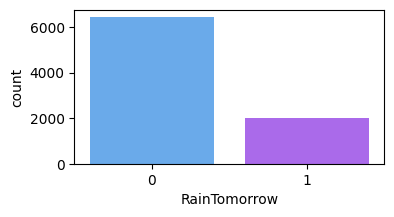

0    6434
1    1991
Name: RainTomorrow, dtype: int64


In [8]:
# Check Distribution of the target label

mp.figure(figsize=(4,2))
sns.countplot(x=df_raw['RainTomorrow'], palette = 'cool')
mp.show()

print(df_raw['RainTomorrow'].value_counts())

*Unbalanced data*
Need to balance it: Apply SMOTE

In [9]:
# Import & apply SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, sampling_strategy='auto', k_neighbors=3)
X = df_raw.drop('RainTomorrow', axis=1)
y = df_raw['RainTomorrow']

print(X.shape)
print(y.shape)

X_resampled, y_resampled = smote.fit_resample(X, y)

print(X_resampled.shape)
print(y_resampled.shape)


df_pf_bl = pd.DataFrame(data = X_resampled, columns = df_raw.columns.to_list())
df_pf_bl['RainTomorrow'] = y_resampled

print(df_pf_bl.shape)

df_pf_bl.head(3)

(8425, 21)
(8425,)
(12868, 21)
(12868,)
(12868, 22)


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,13.4,22.9,0.6,4.6,8.7,13,44.0,13,14,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,1,7.4,25.1,0.0,4.6,8.7,14,44.0,6,15,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,1,12.9,25.7,0.0,4.6,8.7,15,46.0,13,15,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0


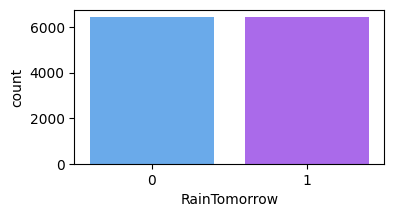

0    6434
1    6434
Name: RainTomorrow, dtype: int64


In [10]:
# Check Distribution of the target label after applying SMOTE

mp.figure(figsize=(4,2))
sns.countplot(x=df_pf_bl['RainTomorrow'], palette = 'cool')
mp.show()

print(df_pf_bl['RainTomorrow'].value_counts())

*Data is now balanced*

**HISTPLOT TO CHECK DISTRIBUTION**

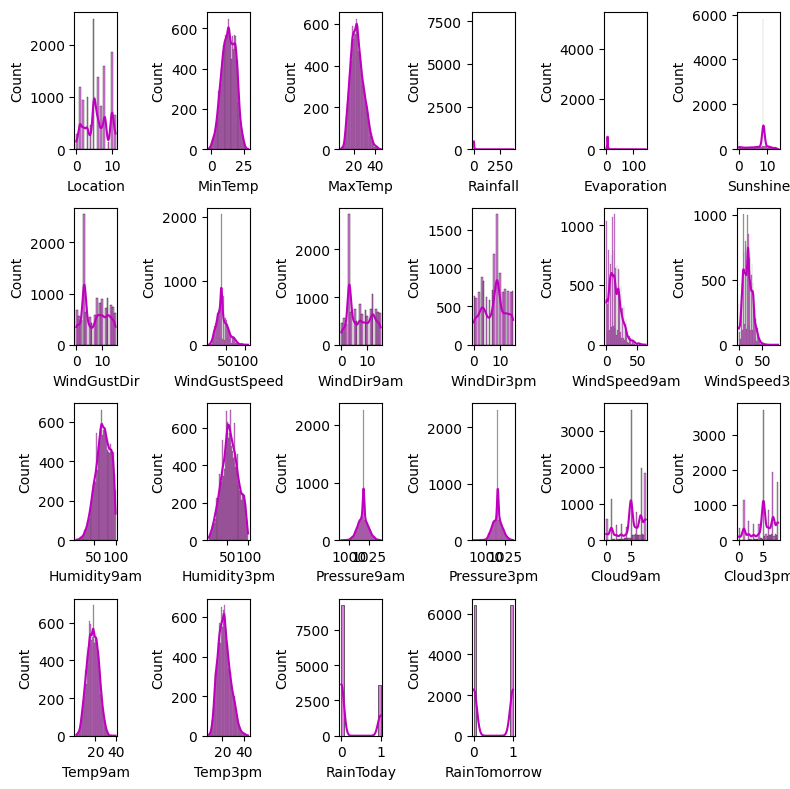

In [11]:
# Histplot to check distribution

mp.figure(figsize=(8,8))
pnum = 1

for index in df_pf_bl.columns.to_list():
  if(pnum<=22):
    ax = mp.subplot(4,6, pnum)
    sns.histplot(df_pf_bl[index], kde = True, color = 'm')
    mp.xlabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

Slight Skewness & Deviation in few labels

In [12]:
# Check Std Deviation

for index in df_pf_bl.columns.to_list():
  print(index,':', df_pf_bl[index].nunique(), ', type:',df_raw[index].dtype,', std Dev:',df_pf_bl[index].std())

Location : 12 , type: int64 , std Dev: 3.091588712030859
MinTemp : 3958 , type: float64 , std Dev: 5.233715496957204
MaxTemp : 4014 , type: float64 , std Dev: 5.98197704595158
Rainfall : 3005 , type: float64 , std Dev: 12.591841384898242
Evaporation : 2629 , type: float64 , std Dev: 3.603227027583453
Sunshine : 2482 , type: float64 , std Dev: 3.005929825490664
WindGustDir : 16 , type: int64 , std Dev: 4.532443920108302
WindGustSpeed : 2972 , type: float64 , std Dev: 14.36323911307775
WindDir9am : 16 , type: int64 , std Dev: 4.4689333376099665
WindDir3pm : 16 , type: int64 , std Dev: 4.294835769159094
WindSpeed9am : 2972 , type: float64 , std Dev: 10.146885834146023
WindSpeed3pm : 3127 , type: float64 , std Dev: 9.87680730857692
Humidity9am : 3530 , type: float64 , std Dev: 16.661857907143407
Humidity3pm : 3547 , type: float64 , std Dev: 19.26604196939659
Pressure9am : 3565 , type: float64 , std Dev: 6.266709868772288
Pressure3pm : 3578 , type: float64 , std Dev: 6.211372553654422
Cloud

Std Dev is high on all numerical continous columns

In [13]:
# Applying Robust Scalar to reduce Std Dev

from sklearn.preprocessing import RobustScaler

# Create a RobustScaler object
scaler = RobustScaler()

# Columns to Scale
columns_to_scale1 = ['MinTemp','MaxTemp','Rainfall', 'Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm']
columns_to_scale2 = ['Humidity9am','Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm','Temp9am','Temp3pm' ]

columns_to_scale = columns_to_scale1 + columns_to_scale2

# Create a DataFrame containing with selected columns
df_pf_feat = df_pf_bl[columns_to_scale]

# Scaleing
df_pf_sca = pd.DataFrame(scaler.fit_transform(df_pf_feat), columns=columns_to_scale)

# Reset the index of df_raw
df_pf_bl.reset_index(drop=True, inplace=True)

# Replace scaled columns
df_pf_bl[columns_to_scale] = df_pf_sca

# Print information about the scaled DataFrame and check for NaN values and standard deviations
print(df_pf_bl.shape)
print(df_pf_bl.std())

(12868, 22)
Location         3.091589
MinTemp          0.654214
MaxTemp          0.728250
Rainfall         4.630066
Evaporation      2.739372
Sunshine         1.366332
WindGustDir      4.532444
WindGustSpeed    0.776716
WindDir9am       4.468933
WindDir3pm       4.294836
WindSpeed9am     0.780530
WindSpeed3pm     0.658454
Humidity9am      0.694244
Humidity3pm      0.713557
Pressure9am      0.851561
Pressure3pm      0.839375
Cloud9am         0.779705
Cloud3pm         0.793488
Temp9am          0.695090
Temp3pm          0.730495
RainToday        0.449698
RainTomorrow     0.500019
dtype: float64


**Visualizing Outliers using Box-Plot**

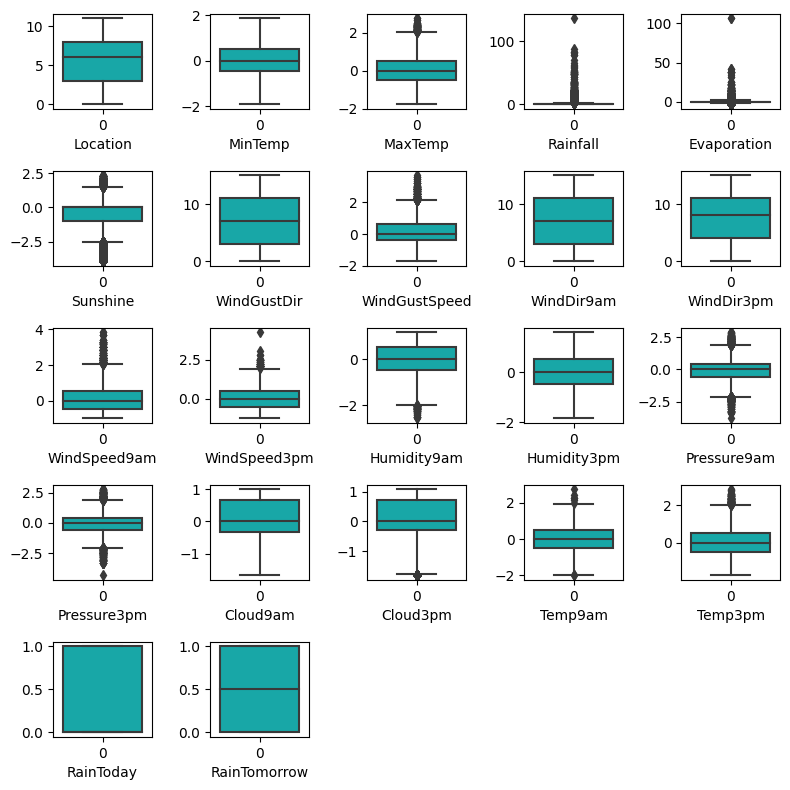

In [14]:
# Visulize outliers using BoxPlot

mp.figure(figsize=(8,8))
pnum = 1

for index in df_pf_bl.columns.to_list():
  if(pnum<=22):
    ax = mp.subplot(5,5, pnum)
    sns.boxplot(df_pf_bl[index], color = 'c')
    mp.xlabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

(12868, 21)
(12868,)


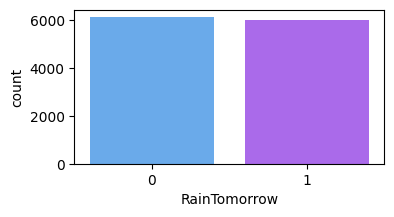

0    6137
1    6020
Name: RainTomorrow, dtype: int64
(12157, 22)


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
7063,8,0.2125,0.865445,0.0,1.672561,-0.136364,3,0.000000,10,4,...,-1.243454,-1.259259,0.203830,0.094595,-0.673172,0.720555,0.283645,0.935526,0,0
3835,10,0.6250,0.329786,0.0,0.912306,-3.181818,11,-0.108153,7,11,...,0.964880,0.592593,-0.067943,-0.067568,0.673172,0.720555,0.462089,0.436579,0,1
3811,10,0.3250,1.011534,0.0,0.000000,0.000000,0,0.108153,5,1,...,0.048213,-0.444444,0.543546,0.513514,0.000000,0.000000,0.666025,0.960474,0,0


In [15]:
# Removing Outliers where |Z-score| > 3
# With Loan_status as target

df_pf_tg1 = df_pf_bl['RainTomorrow']
df_pf_ft1 = df_pf_bl.drop('RainTomorrow', axis =1, inplace = False)

df_pf_fil1 = df_pf_bl[(np.abs(sp.zscore(df_pf_bl)) <= 3).all(axis=1)]

print(df_pf_ft1.shape)
print(df_pf_tg1.shape)

mp.figure(figsize=(4,2))
sns.countplot(x = df_pf_fil1['RainTomorrow'], palette = 'cool')
mp.show()

print(df_pf_fil1['RainTomorrow'].value_counts())
print(df_pf_fil1.shape)
df_pf_fil1.sample(3)

**Outliers have been removed**

In [16]:
# CHECK Skewness

df_pf_fil1.skew()

Location        -0.016259
MinTemp         -0.114878
MaxTemp          0.311897
Rainfall         3.096773
Evaporation      1.207666
Sunshine        -1.021236
WindGustDir      0.099276
WindGustSpeed    0.534388
WindDir9am       0.175369
WindDir3pm      -0.102896
WindSpeed9am     0.640963
WindSpeed3pm     0.295590
Humidity9am     -0.357019
Humidity3pm     -0.004494
Pressure9am      0.015750
Pressure3pm      0.061734
Cloud9am        -0.704610
Cloud3pm        -0.686571
Temp9am         -0.035195
Temp3pm          0.336261
RainToday        1.019604
RainTomorrow     0.019251
dtype: float64

In [ ]:
# Apply Cuberoot Transformation to reduce skewness

df_pf_fil1['Rainfall'] = np.cbrt(df_pf_fil1['Rainfall'])
df_pf_fil1['Evaporation'] = np.cbrt(df_pf_fil1['Evaporation'])
df_pf_fil1['Sunshine'] = np.cbrt(df_pf_fil1['Sunshine'])

df_pf_fil1.skew()

Location        -0.016259
MinTemp         -0.114878
MaxTemp          0.311897
Rainfall         1.031699
Evaporation      0.240454
Sunshine        -0.090926
WindGustDir      0.099276
WindGustSpeed    0.534388
WindDir9am       0.175369
WindDir3pm      -0.102896
WindSpeed9am     0.640963
WindSpeed3pm     0.295590
Humidity9am     -0.357019
Humidity3pm     -0.004494
Pressure9am      0.015750
Pressure3pm      0.061734
Cloud9am        -0.704610
Cloud3pm        -0.686571
Temp9am         -0.035195
Temp3pm          0.336261
RainToday        1.019604
RainTomorrow     0.019251
dtype: float64

**Skewness is now within acceptable limits**

In [17]:
# CHECK STD DEV

df_pf_fil1.std()

Location         3.080352
MinTemp          0.654985
MaxTemp          0.707760
Rainfall         2.284676
Evaporation      1.623815
Sunshine         1.354283
WindGustDir      4.530324
WindGustSpeed    0.728091
WindDir9am       4.455508
WindDir3pm       4.294616
WindSpeed9am     0.725808
WindSpeed3pm     0.633401
Humidity9am      0.674054
Humidity3pm      0.698921
Pressure9am      0.810828
Pressure3pm      0.798188
Cloud9am         0.778598
Cloud3pm         0.792694
Temp9am          0.687765
Temp3pm          0.710038
RainToday        0.445483
RainTomorrow     0.499997
dtype: float64

*Removal of outliers & robust scaling has reduced std. deviation for all numerical labels*

# GRAPHICAL ANALYSIS - BIVARIATE

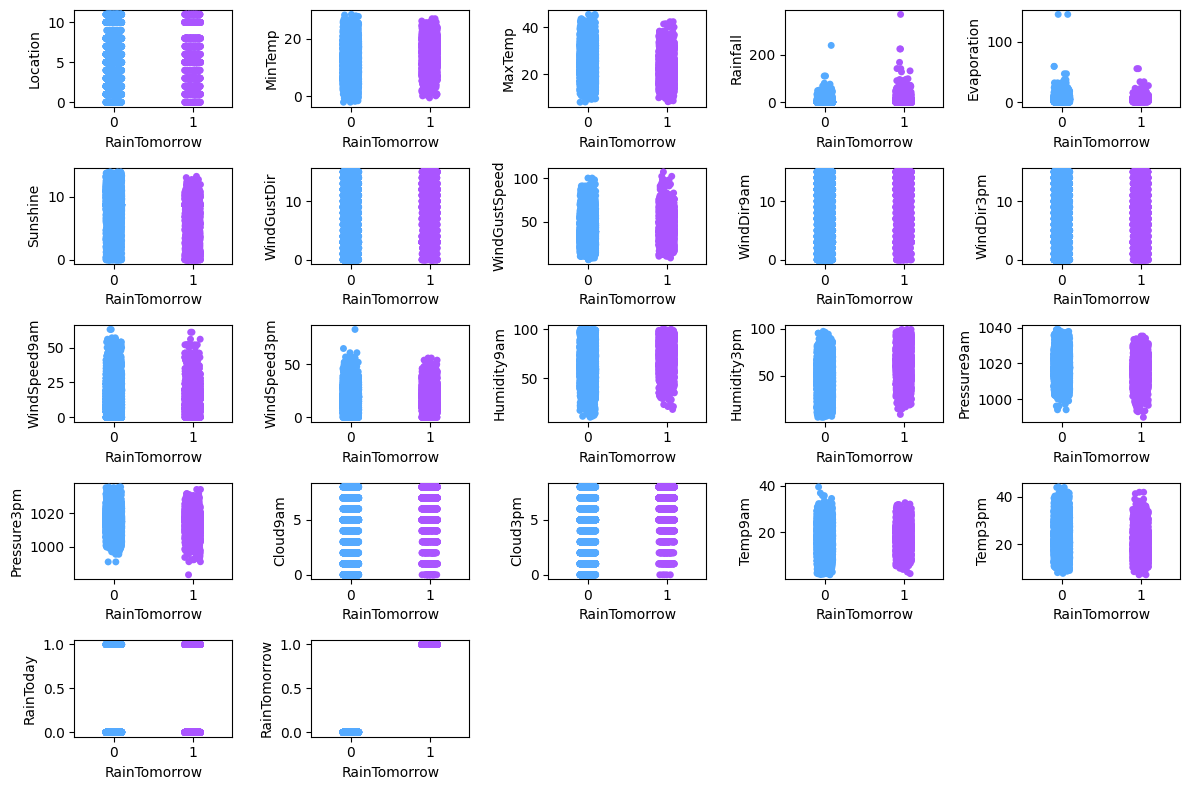

In [18]:
# Stripplpt wrt RainTomorrow

mp.figure(figsize=(12,8))
pnum = 1

for index in df_pf_fil1.columns.to_list():
  if(pnum<=22):
    ax = mp.subplot(5,5, pnum)
    sns.stripplot(x=df_raw['RainTomorrow'], y =df_raw[index], palette = 'cool')
    mp.ylabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

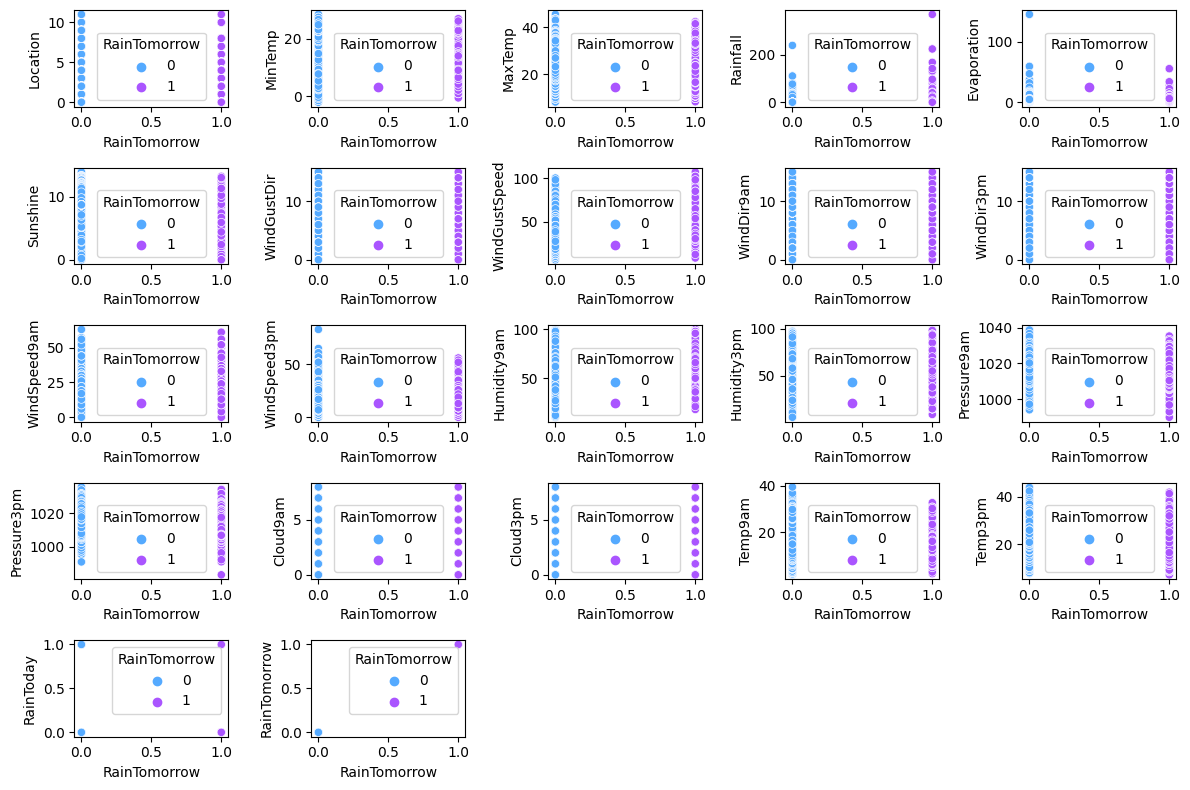

In [19]:
# Scatterplot wrt Primary_Fuel

mp.figure(figsize=(12,8))
pnum = 1

for index in df_pf_fil1.columns.to_list():
  if(pnum<=22):
    ax = mp.subplot(5,5, pnum)
    sns.scatterplot(x=df_raw['RainTomorrow'], y =df_raw[index], palette = 'cool', hue = df_raw['RainTomorrow'])
    mp.ylabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

# GARPHICAL ANALYSIS - MULTIVARIATE

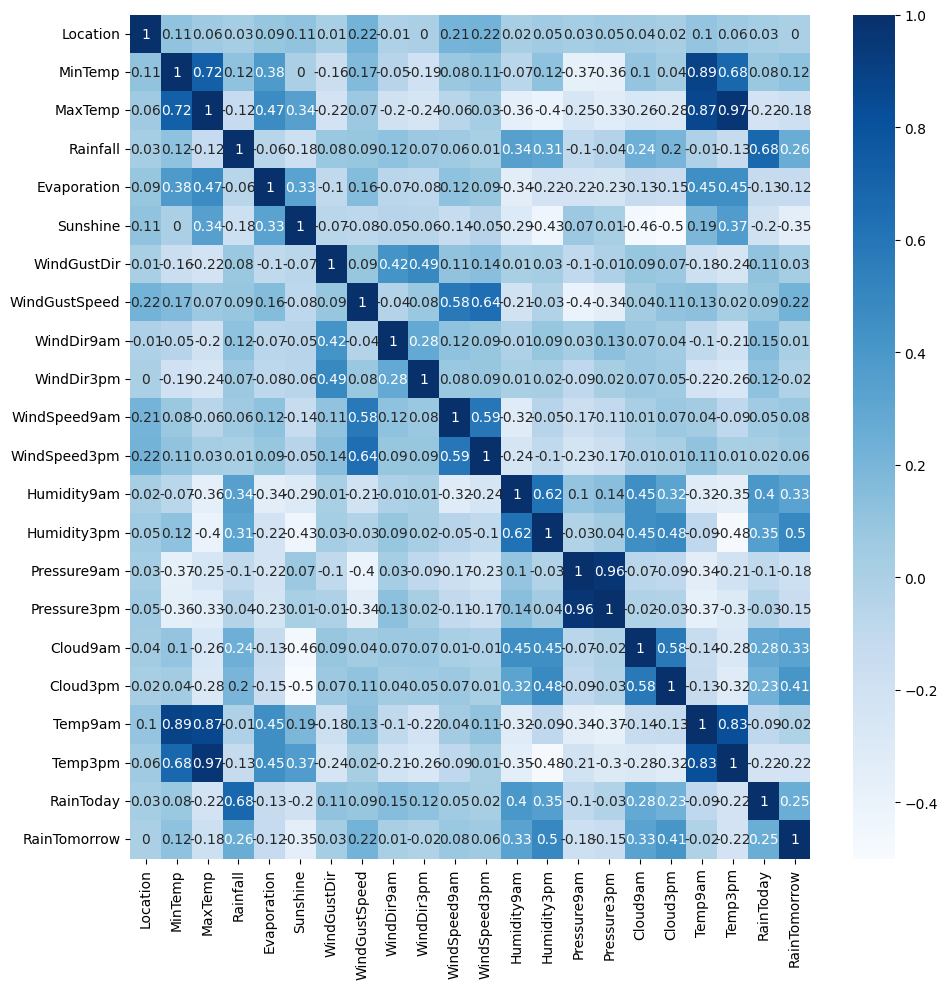

In [20]:
mp.figure(figsize=(10,10))
sns.heatmap(round(df_pf_fil1.corr(),2), cmap = 'Blues', annot = True)
mp.tight_layout()
mp.show()

1. MaxTemp. MinTemp shows high +ve correlation with Temp3PM , Temp9AM

2. RainToday and Rainfall shows strong +ve correlation

# CHECKING COLLINEARITY & VIF

In [21]:
# Checking VIF

# Separating Target label Avg Price
df_pf_vf = df_pf_fil1.drop('RainTomorrow', axis =1, inplace = False)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = df_pf_vf.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_pf_vf.values,i) for i in range(len(df_pf_vf.columns))]

vif

,Feature,VIF Val
0,Location,3.464660
1,MinTemp,9.158066
2,MaxTemp,25.423983
3,Rainfall,2.339319
4,Evaporation,1.515126
5,Sunshine,1.850906
6,WindGustDir,5.389626
7,WindGustSpeed,2.353637
8,WindDir9am,4.448321
9,WindDir3pm,5.426148


In [22]:
# Remove Collinearity by dropping High VIF label , ie, Temp3pm

df_pf_vf.drop('Temp3pm', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_pf_vf.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_pf_vf.values,i) for i in range(len(df_pf_vf.columns))]

vif

,Feature,VIF Val
0,Location,3.391867
1,MinTemp,9.069730
2,MaxTemp,9.413328
3,Rainfall,2.338155
4,Evaporation,1.515105
5,Sunshine,1.850727
6,WindGustDir,5.386783
7,WindGustSpeed,2.334020
8,WindDir9am,4.448076
9,WindDir3pm,5.426070


In [23]:
# Remove Collinearity by dropping High VIF label , ie, Pressure9am

df_pf_vf.drop('Pressure9am', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_pf_vf.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_pf_vf.values,i) for i in range(len(df_pf_vf.columns))]

vif

,Feature,VIF Val
0,Location,3.242964
1,MinTemp,8.982328
2,MaxTemp,8.906671
3,Rainfall,2.336857
4,Evaporation,1.505894
5,Sunshine,1.848113
6,WindGustDir,5.378410
7,WindGustSpeed,2.315429
8,WindDir9am,4.429023
9,WindDir3pm,5.270771


In [24]:
# Remove Collinearity by dropping High VIF label , ie, Temp9am

df_pf_vf.drop('Temp9am', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_pf_vf.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_pf_vf.values,i) for i in range(len(df_pf_vf.columns))]

vif

,Feature,VIF Val
0,Location,3.242652
1,MinTemp,4.371719
2,MaxTemp,5.277378
3,Rainfall,2.333734
4,Evaporation,1.504964
5,Sunshine,1.835657
6,WindGustDir,5.378247
7,WindGustSpeed,2.276019
8,WindDir9am,4.421727
9,WindDir3pm,5.236597


*VIF Now wothin acceptable limits*

# CLASSIFICATION MODELS: TARGET LABEL: RAIN TOMMOROW

Separate Independent & Target Label



In [25]:
# Separate independent & target labels

x_dfc = df_pf_vf
y_dfc = df_pf_fil1['RainTomorrow']

# Import Libraraies
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint


print(x_dfc.shape)
print(y_dfc.shape)

(12157, 18)
(12157,)


# RANDOM FOREST CLF

In [26]:
# Hypertuning RFC Parameters

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
param_dist = {"max_depth": [4, None],
   "max_features": sp_randint(1, 15),
   "min_samples_split": sp_randint(2, 11),
   "criterion": ["gini", "entropy"], "random_state" : range(0, 100)}

samples = 8
randomCV = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=samples,cv=5)
randomCV.fit(x_dfc, y_dfc)
print(randomCV.best_params_)

bp_rfc = randomCV.best_params_


{'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_split': 8, 'random_state': 90}


In [28]:
# Training the RFC Model with given best hypertuning parameters

RFC = RandomForestClassifier(criterion = bp_rfc['criterion'], max_depth = bp_rfc['max_depth'], max_features = bp_rfc['max_features'], min_samples_split = bp_rfc['min_samples_split'], random_state =bp_rfc['random_state'])
max_acc = 0
rst_rfc = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_dfc, y_dfc, random_state = i, test_size = 0.2)
  RFC.fit(x_train, y_train)
  pred = RFC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    rst_rfc = i

print('Best Random State:', rst_rfc, 'with accuracy score:', max_acc)

Best Random State: 88 with accuracy score: 0.9399671052631579


# EXTRA TREES CLASSIFIER

In [30]:
# Hypertuning Parameters

from sklearn.tree import ExtraTreeClassifier

etc = ExtraTreeClassifier()
param_dist = {"max_depth": [4, None],
   "max_features": sp_randint(1, 15),
   "min_samples_split": sp_randint(2, 11),
   "criterion": ["gini", "entropy"], "random_state" : range(0, 100)}

samples = 8
randomCV = RandomizedSearchCV(etc, param_distributions=param_dist, n_iter=samples,cv=5)
randomCV.fit(x_dfc, y_dfc)
print(randomCV.best_params_)

bp_etc = randomCV.best_params_

{'criterion': 'entropy', 'max_depth': None, 'max_features': 11, 'min_samples_split': 4, 'random_state': 23}


In [31]:
# Training the ETC  Model with given best hypertuning parameters
ETC = ExtraTreeClassifier(criterion = bp_etc['criterion'], max_depth = bp_etc['max_depth'], max_features = bp_etc['max_features'], min_samples_split = bp_etc['min_samples_split'], random_state = bp_etc['random_state'] )
max_acc = 0
rst_etc = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_dfc, y_dfc, random_state = i, test_size = 0.2)
  ETC.fit(x_train, y_train)
  pred = ETC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    rst_etc = i

print('Best Random State:', rst_etc, 'with accuracy score:', max_acc)

Best Random State: 81 with accuracy score: 0.8881578947368421


# DECISION TREE CLASSIFIER

In [32]:
# Hypertuning Parameters

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
param_dist = {"max_depth": [4, None],
   "max_features": sp_randint(1, 15),
   "min_samples_split": sp_randint(2, 11),
   "criterion": ["gini", "entropy"], "random_state" : range(0, 100)}

samples = 8
randomCV = RandomizedSearchCV(dtc, param_distributions=param_dist, n_iter=samples,cv=5)
randomCV.fit(x_dfc, y_dfc)
print(randomCV.best_params_)

bp_dtc = randomCV.best_params_

{'criterion': 'entropy', 'max_depth': None, 'max_features': 13, 'min_samples_split': 8, 'random_state': 88}


In [33]:
# Training the DTC  Model with given best hypertuning parameters
DTC = DecisionTreeClassifier(criterion = bp_dtc['criterion'], max_depth = bp_dtc['max_depth'], max_features = bp_dtc['max_features'], min_samples_split = bp_dtc['min_samples_split'], random_state = bp_dtc['random_state'] )
max_acc = 0
rst_dtc = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_dfc, y_dfc, random_state = i, test_size = 0.2)
  DTC.fit(x_train, y_train)
  pred = DTC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    rst_dtc = i

print('Best Random State:', rst_dtc, 'with accuracy score:', max_acc)

Best Random State: 58 with accuracy score: 0.897203947368421


# KNN

In [34]:
# Hypertuning Parameters

from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()

param = {"n_neighbors": [3,5,7],
   "weights": ['uniform', 'distance'],
   "p": [1,2]}

samples = 8
randomCV = RandomizedSearchCV(knc, param_distributions=param, n_iter = samples,cv=5)
randomCV.fit(x_dfc, y_dfc)
print(randomCV.best_params_)

bp_knc = randomCV.best_params_

{'weights': 'distance', 'p': 1, 'n_neighbors': 3}


In [35]:
# Training KNN Model

max_acc = 0
rst_knc = 0
KNN = KNeighborsClassifier(weights = bp_knc['weights'], p = bp_knc['p'], n_neighbors = bp_knc['n_neighbors'])

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_dfc, y_dfc, random_state = i, test_size = 0.2)

  KNN.fit(x_train, y_train)
  pred = KNN.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    rst_knc = i

print('Best Random State:', rst_knc, 'with accuracy score:', max_acc)

Best Random State: 55 with accuracy score: 0.9321546052631579


# ADABOOST

In [37]:
# Hypertuning Parameters

from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()

param = {"n_estimators": sp_randint(1, 100),
   "learning_rate": sp_randint(1, 15),
   "algorithm": ['SAMME.R', 'SAMME'],
    "random_state" : range(0, 100)}

samples = 8
randomCV = RandomizedSearchCV(abc, param_distributions=param, n_iter = samples,cv=5)
randomCV.fit(x_dfc, y_dfc)
print(randomCV.best_params_)

bp_abc = randomCV.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 9, 'n_estimators': 29, 'random_state': 28}


In [38]:
# Training ABC Model

max_acc = 0
rst_abc = 0
ABC = AdaBoostClassifier(n_estimators = bp_abc['n_estimators'], learning_rate = bp_abc['learning_rate'],
                         algorithm = bp_abc['algorithm'],random_state = bp_abc['random_state'] )

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_dfc, y_dfc, random_state = i, test_size = 0.2)

  ABC.fit(x_train, y_train)
  pred = ABC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    rst_abc = i

print('Best Random State:', rst_abc, 'with accuracy score:', max_acc)

Best Random State: 88 with accuracy score: 0.7368421052631579


**CHECK AVG CV Scores**

In [39]:
# Checking CV Score

from sklearn.model_selection import cross_val_score

cv = 5
model_list = [RFC, ETC, DTC, KNN, ABC]
cv_score_list = []

for mdl in model_list:
  cvs = cross_val_score(mdl, x_dfc,y_dfc)
  print(mdl, ': Avg CV Score is ', round(cvs.mean(),4))
  print('\n')

RandomForestClassifier(criterion='entropy', max_features=10,
                       min_samples_split=8, random_state=90) : Avg CV Score is  0.8314


ExtraTreeClassifier(criterion='entropy', max_features=11, min_samples_split=4,
                    random_state=23) : Avg CV Score is  0.7829


DecisionTreeClassifier(criterion='entropy', max_features=13,
                       min_samples_split=8, random_state=88) : Avg CV Score is  0.8038


KNeighborsClassifier(n_neighbors=3, p=1, weights='distance') : Avg CV Score is  0.7641


AdaBoostClassifier(learning_rate=9, n_estimators=29, random_state=28) : Avg CV Score is  0.7044




Checking accuracy, score, confusion matrix & classsification reports for RandomforestClassifier

Based on this, selecting RF Clrfr

In [40]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report, confusion_matrix

RFC_RT = RandomForestClassifier(criterion = bp_rfc['criterion'], max_depth = bp_rfc['max_depth'], max_features = bp_rfc['max_features'], min_samples_split = bp_rfc['min_samples_split'], random_state =bp_rfc['random_state'])

x_train, x_test, y_train, y_test = train_test_split(x_dfc, y_dfc, random_state = rst_rfc, test_size = 0.2)
RFC_RT.fit(x_train, y_train)
pred = RFC_RT.predict(x_test)

acc_score = accuracy_score(y_test, pred)
print('Accuracy of the Model:', round(acc_score,4))
print('\n')

print('Confusion Matrix:', '\n',confusion_matrix(y_test, pred))
print('\n')

print('Classification Report:', '\n',classification_report(y_test, pred))
print('\n')

Accuracy of the Model: 0.94


Confusion Matrix: 
 [[1212   64]
 [  82 1074]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      1276
           1       0.94      0.93      0.94      1156

    accuracy                           0.94      2432
   macro avg       0.94      0.94      0.94      2432
weighted avg       0.94      0.94      0.94      2432





# AUC-ROC Curve

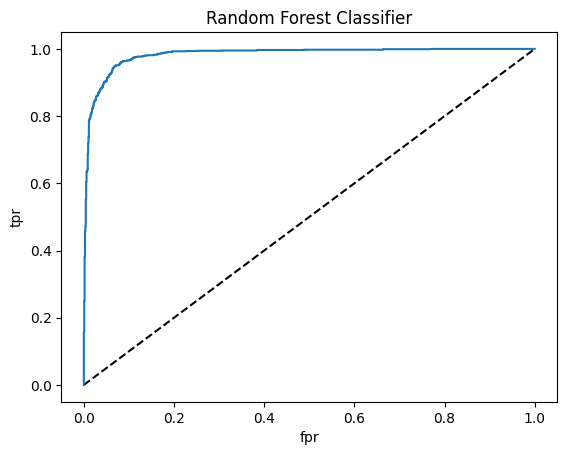

In [41]:
# Checking ROC_AUC Curve

y_pred_prob = RFC_RT.predict_proba(x_test)[:, 0]

# 0 & others

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob, pos_label = 0)

import matplotlib.pyplot as mpp

mp.plot([0,1],[0,1], 'k--')
mp.xlabel('fpr')
mp.ylabel('tpr')
mp.title('Random Forest Classifier')
mp.plot(fpr,tpr)
mp.show()

In [42]:
# Saving the best Model

import joblib

# Save Model to predict Rain Tomorrow
joblib.dump(RFC_RT, 'RFC_RT.pkl')


# Load Rain Tomorrow
load_RFC_RT = joblib.load('RFC_RT.pkl')
RT_RFC = load_RFC_RT


In [43]:
def pred_rt(input):

  inp = np.array(input)
  type_pf  =  RT_RFC.predict(inp.reshape(1, -1))
  reg_pf = le.inverse_transform(type_pf)
  pred_lst = [type_pf, reg_pf]

  return pred_lst

In [44]:
# Checking the predictions

rws = [31, 54, 97, 103, 190]
for row in rws:
  print(row, "\n")

  print('Rainfall Actual ', y_dfc.iloc[row] , 'Rainfall : Y/N:', pred_rt(x_dfc.iloc[row,:])[0])

  print('Rainfall Decoded ', pred_rt(x_dfc.iloc[row,:])[1])

  print('\n')


31 

Rainfall Actual  0 Rainfall : Y/N: [0]
Rainfall Decoded  ['No']


54 

Rainfall Actual  0 Rainfall : Y/N: [0]
Rainfall Decoded  ['No']


97 

Rainfall Actual  0 Rainfall : Y/N: [0]
Rainfall Decoded  ['No']


103 

Rainfall Actual  1 Rainfall : Y/N: [1]
Rainfall Decoded  ['Yes']


190 

Rainfall Actual  1 Rainfall : Y/N: [1]
Rainfall Decoded  ['Yes']




# REGRESSION MODEL TO PREDICT RAINFALL

1. Null values have been handled & categorical labels are encoded



# Non Graphical Analysis

In [45]:
df_rf.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,...,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,5.793591,13.194255,23.855988,2.725982,5.060332,8.138409,7.217804,40.036320,7.267418,7.810445,...,67.823739,51.246766,1017.649519,1015.246030,4.691157,4.647953,17.762267,22.436748,0.236202,0.236320
std,3.162654,5.379497,6.114697,10.319872,3.871619,2.875324,4.702616,13.781296,4.588045,4.430162,...,16.774237,18.311914,6.275796,6.217494,2.437110,2.310476,5.608301,5.946128,0.424773,0.424846
min,0.000000,-2.000000,8.200000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,...,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000
25%,3.000000,9.300000,19.300000,0.000000,4.000000,8.400000,3.000000,31.000000,3.000000,4.000000,...,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000,0.000000,0.000000
50%,6.000000,13.300000,23.300000,0.000000,4.600000,8.700000,7.000000,39.000000,7.000000,8.000000,...,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000,0.000000,0.000000
75%,8.000000,17.300000,28.000000,0.800000,5.200000,8.900000,12.000000,48.000000,12.000000,11.000000,...,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,0.000000,0.000000
max,11.000000,28.500000,45.500000,371.000000,145.000000,13.900000,15.000000,107.000000,15.000000,15.000000,...,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,1.000000,1.000000


In [46]:
# Check Std Dev & Skewness
for index in df_rf.columns.to_list():
  print(index,':', df_rf[index].nunique(), ', type:',df_rf[index].dtype, ', Std. Dev:',df_rf[index].std(), ', Skewness:',df_rf[index].skew() )

Location : 12 , type: int64 , Std. Dev: 3.1626540382899493 , Skewness: -0.0504563341011458
MinTemp : 285 , type: float64 , Std. Dev: 5.379497300844907 , Skewness: -0.09051865315318136
MaxTemp : 331 , type: float64 , Std. Dev: 6.114696892817108 , Skewness: 0.3825719132134134
Rainfall : 250 , type: float64 , Std. Dev: 10.319871886658424 , Skewness: 13.200522661614254
Evaporation : 116 , type: float64 , Std. Dev: 3.8716189040202886 , Skewness: 14.063999515800404
Sunshine : 140 , type: float64 , Std. Dev: 2.8753238119647526 , Skewness: -1.1893327900404294
WindGustDir : 16 , type: int64 , Std. Dev: 4.702615522880524 , Skewness: 0.11963991281513647
WindGustSpeed : 52 , type: float64 , Std. Dev: 13.781296446946936 , Skewness: 0.786152903346168
WindDir9am : 16 , type: int64 , Std. Dev: 4.588044798691915 , Skewness: 0.17279161959494332
WindDir3pm : 16 , type: int64 , Std. Dev: 4.430162427041383 , Skewness: -0.11984703850529045
WindSpeed9am : 34 , type: float64 , Std. Dev: 10.128895789498968 , S

**High Std Dev can be seen in almost all numeric contonous label**

In [48]:
# Applying Robust Scalar to reduce Std Dev

from sklearn.preprocessing import RobustScaler

# Create a RobustScaler object
scaler1 = RobustScaler()

# Columns to Scale
columns_to_scale1 = ['MinTemp','MaxTemp', 'Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm']
columns_to_scale2 = ['Humidity9am','Humidity3pm','Pressure9am', 'Pressure3pm','Temp9am','Temp3pm' ]

columns_to_scale = columns_to_scale1 + columns_to_scale2

# Create a DataFrame containing with selected columns
df_rf_feat = df_rf[columns_to_scale]

# Scaleing
df_rf_sca = pd.DataFrame(scaler.fit_transform(df_rf_feat), columns=columns_to_scale)

# Reset the index of df_raw
df_rf.reset_index(drop=True, inplace=True)

# Replace scaled columns
df_rf[columns_to_scale] = df_rf_sca

# Print information about the scaled DataFrame and check for NaN values and standard deviations
print(df_rf.shape)

# Check Std Dev & Skewness
for index in df_rf.columns.to_list():
  print(index,':', df_rf[index].nunique(), ', type:',df_rf[index].dtype, ', Std. Dev:',df_rf[index].std(), ', Skewness:',df_rf[index].skew() )

(8425, 22)
Location : 12 , type: int64 , Std. Dev: 3.1626540382899493 , Skewness: -0.0504563341011458
MinTemp : 285 , type: float64 , Std. Dev: 0.6724371626056134 , Skewness: -0.09051865315318078
MaxTemp : 331 , type: float64 , Std. Dev: 0.7028387233123112 , Skewness: 0.38257191321341166
Rainfall : 250 , type: float64 , Std. Dev: 10.319871886658424 , Skewness: 13.200522661614254
Evaporation : 116 , type: float64 , Std. Dev: 3.2263490866835736 , Skewness: 14.063999515800418
Sunshine : 140 , type: float64 , Std. Dev: 2.8753238119647526 , Skewness: -1.1893327900404294
WindGustDir : 16 , type: int64 , Std. Dev: 4.702615522880524 , Skewness: 0.11963991281513647
WindGustSpeed : 52 , type: float64 , Std. Dev: 0.8106644968792316 , Skewness: 0.7861529033461678
WindDir9am : 16 , type: int64 , Std. Dev: 4.588044798691915 , Skewness: 0.17279161959494332
WindDir3pm : 16 , type: int64 , Std. Dev: 4.430162427041383 , Skewness: -0.11984703850529045
WindSpeed9am : 34 , type: float64 , Std. Dev: 0.72349

*Std Dev is within acceptable limits in some of the labels*

*Checking presence of Outliers*

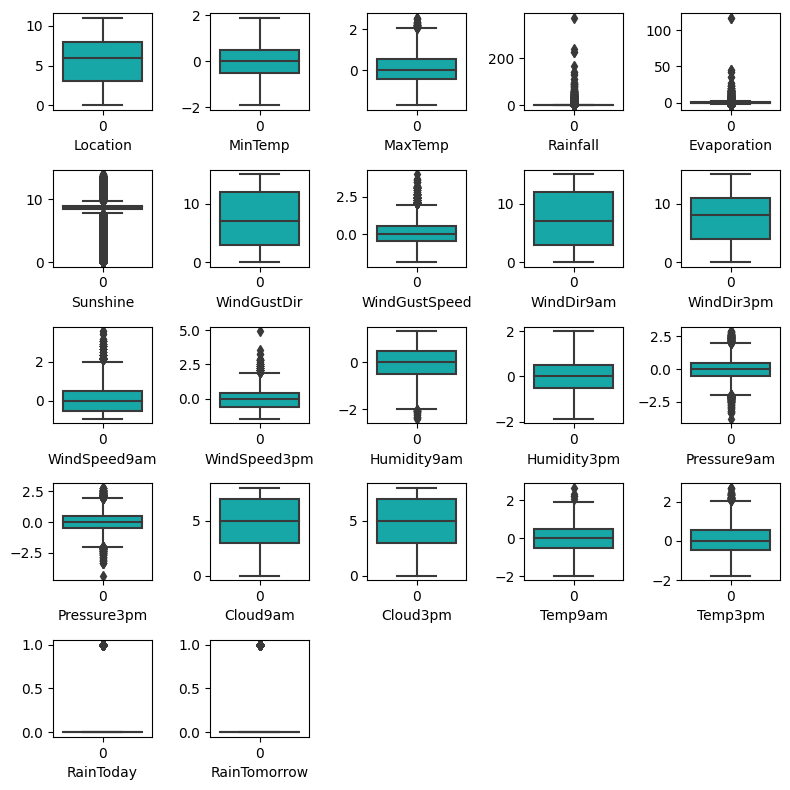

In [49]:
# Visulize outliers using BoxPlot

mp.figure(figsize=(8,8))
pnum = 1

for index in df_rf.columns.to_list():
  if(pnum<=22):
    ax = mp.subplot(5,5, pnum)
    sns.boxplot(df_rf[index], color = 'c')
    mp.xlabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

In [50]:
# Removing Outliers where |Z-score| > 3
# With Loan_status as target

df_rf_tg1 = df_rf['Rainfall']
df_rf_ft1 = df_rf.drop('Rainfall', axis =1, inplace = False)

df_rf_fil1 = df_rf[(np.abs(sp.zscore(df_rf_ft1)) <= 3).all(axis=1)]

print(df_rf_ft1.shape)
print(df_rf_tg1.shape)

print(df_rf_fil1.shape)
df_rf_fil1.sample(3)

(8425, 21)
(8425,)
(8095, 22)


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2259,6,-0.6875,-0.873563,10.6,0.0,8.7,3,0.0,3,9,...,0.625000,0.208333,0.0,0.0,7.0,3.0,-0.864198,-0.865854,1,0
2252,6,-0.0625,-0.298851,0.0,0.0,8.7,3,0.0,3,9,...,0.458333,0.000000,0.0,0.0,7.0,5.0,-0.246914,0.000000,0,0
2105,6,0.4625,1.402299,0.0,0.0,8.7,3,0.0,7,4,...,-1.083333,-0.958333,0.0,0.0,0.0,1.0,1.012346,1.475610,0,0


In [51]:
# Check Std Dev & Skewness

for index in df_rf_fil1.columns.to_list():
  print(index,':', df_rf_fil1[index].nunique(), ', type:',df_rf_fil1[index].dtype, ', Std. Dev:',df_rf_fil1[index].std(), ', Skewness:',df_rf_fil1[index].skew() )

Location : 12 , type: int64 , Std. Dev: 3.1526195881213064 , Skewness: -0.035795955670504066
MinTemp : 282 , type: float64 , Std. Dev: 0.6712583363363586 , Skewness: -0.09508173862401263
MaxTemp : 319 , type: float64 , Std. Dev: 0.6877566703257081 , Skewness: 0.3238395018683308
Rainfall : 242 , type: float64 , Std. Dev: 10.185180909956987 , Skewness: 13.877750099217204
Evaporation : 83 , type: float64 , Std. Dev: 1.9173864514846435 , Skewness: 1.2817522087956785
Sunshine : 140 , type: float64 , Std. Dev: 2.8750226242879156 , Skewness: -1.20375305010053
WindGustDir : 16 , type: int64 , Std. Dev: 4.699617976121278 , Skewness: 0.11145233621539148
WindGustSpeed : 41 , type: float64 , Std. Dev: 0.7525177002547297 , Skewness: 0.542083985855424
WindDir9am : 16 , type: int64 , Std. Dev: 4.584986504131549 , Skewness: 0.1522402291740205
WindDir3pm : 16 , type: int64 , Std. Dev: 4.414423562960937 , Skewness: -0.12957513773154505
WindSpeed9am : 25 , type: float64 , Std. Dev: 0.6734406924720578 , S

**STD DEV & SKEWNESS IS WITHIN ACCEPTABLE LIMITS FOR ALL LABELS**


# CHECKING COLLINEARITY & VIF

In [52]:
# Checking VIF

# Separating Target label Avg Price
df_rf_vf = df_rf_fil1.drop('Rainfall', axis =1, inplace = False)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = df_rf_vf.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_rf_vf.values,i) for i in range(len(df_rf_vf.columns))]

vif

,Feature,VIF Val
0,Location,4.824839
1,MinTemp,8.405540
2,MaxTemp,26.562188
3,Evaporation,1.516576
4,Sunshine,7.615741
5,WindGustDir,5.344714
6,WindGustSpeed,2.425722
7,WindDir9am,4.584939
8,WindDir3pm,5.804975
9,WindSpeed9am,2.043020


In [53]:
# Remove Collinearity by dropping High VIF label , ie, Temp3pm

df_rf_vf.drop('Temp3pm', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_rf_vf.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_rf_vf.values,i) for i in range(len(df_rf_vf.columns))]

vif

,Feature,VIF Val
0,Location,4.812794
1,MinTemp,8.335755
2,MaxTemp,9.596889
3,Evaporation,1.516426
4,Sunshine,7.558890
5,WindGustDir,5.337686
6,WindGustSpeed,2.411712
7,WindDir9am,4.583920
8,WindDir3pm,5.803743
9,WindSpeed9am,2.041949


In [54]:
# Remove Collinearity by dropping High VIF label , ie, Pressure9am

df_rf_vf.drop('Pressure9am', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_rf_vf.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_rf_vf.values,i) for i in range(len(df_rf_vf.columns))]

vif

,Feature,VIF Val
0,Location,4.802706
1,MinTemp,8.202104
2,MaxTemp,9.185086
3,Evaporation,1.499616
4,Sunshine,7.303524
5,WindGustDir,5.296753
6,WindGustSpeed,2.388724
7,WindDir9am,4.538187
8,WindDir3pm,5.581790
9,WindSpeed9am,2.041015


In [55]:
# Remove Collinearity by dropping High VIF label , ie, Temp9am

df_rf_vf.drop('Temp9am', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_rf_vf.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_rf_vf.values,i) for i in range(len(df_rf_vf.columns))]

vif

,Feature,VIF Val
0,Location,4.750310
1,MinTemp,4.381515
2,MaxTemp,5.415391
3,Evaporation,1.499176
4,Sunshine,7.297831
5,WindGustDir,5.294331
6,WindGustSpeed,2.352758
7,WindDir9am,4.537818
8,WindDir3pm,5.579519
9,WindSpeed9am,2.009487


**VIF NOW WITHIN ACCEPTABLE LIMITS**

# APPLYING REGRESSION MODELS TO PREDICT RAINFALL

In [56]:
# Separate independent & target labels

x_dfr = df_rf_vf
y_dfr = df_rf_fil1['Rainfall']

# Import Libraraies
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint


print(x_dfr.shape)
print(y_dfr.shape)

(8095, 18)
(8095,)


In [57]:
# Import Libraries

from sklearn.linear_model import Lasso, Ridge, LinearRegression, ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [58]:
# Hypertuning various models for Next_Tmax

ls = Lasso()
rd = Ridge()
en = ElasticNet()

mdl = [ls, rd, en]

param = {"alpha": [0.001, 0.01, 0.1,1,10], "random_state": range(1,100)}

samples = 8
bs_prm = []

for mod in mdl:
  randomCV = RandomizedSearchCV(mod, param_distributions=param, n_iter=samples,cv=5)
  randomCV.fit(x_dfr, y_dfr)
  print(mod, randomCV.best_params_)
  bs_prm.append(randomCV.best_params_)

Lasso() {'random_state': 3, 'alpha': 0.01}
Ridge() {'random_state': 85, 'alpha': 10}
ElasticNet() {'random_state': 29, 'alpha': 0.001}


**CHECKING METRICS**

In [59]:

from sklearn.metrics import  mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

min_mse = 999999999999999999999999
bs_prm

[{'random_state': 3, 'alpha': 0.01},
 {'random_state': 85, 'alpha': 10},
 {'random_state': 29, 'alpha': 0.001}]

**Checking Metrics of Lasso**



In [60]:
# Chekcing Metrics of Lasso

bsp = bs_prm[0]
LS = Lasso(random_state = bsp['random_state'], alpha = bsp['alpha'])

bst_rs_ls = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_dfr, y_dfr, random_state = i, test_size = 0.2)
  LS.fit(x_train, y_train)
  predict = LS.predict(x_test)
  msq_err = mean_squared_error(y_test, predict)
  r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):
    min_mse = msq_err
    bst_rs_ls = i

print("Least MSE at random state = ", bst_rs_ls, 'mse:',min_mse, "r2_scr:", r2_sc)

Least MSE at random state =  36 mse: 24.115707674274994 r2_scr: 0.3478372956896293


**CHecking Ridge Metrics**

In [62]:
# Applying Ridge with hypertuned parameters

bsp = bs_prm[1]
RG = Ridge(random_state = bsp['random_state'], alpha = bsp['alpha'])

bst_rs_rd = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_dfr, y_dfr, random_state = i, test_size = 0.2)
  RG.fit(x_train, y_train)
  predict = RG.predict(x_test)
  msq_err = mean_squared_error(y_test, predict)
  r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):
    min_mse = msq_err
    bst_rs = i

print("Least MSE at random state = ", bst_rs_rd, 'mse:',min_mse, "r2_scr:", r2_sc)

Least MSE at random state =  0 mse: 24.115707674274994 r2_scr: 0.3472114109677922


**Checking Metrics of ElasticNet**

In [63]:
# Applying ElasticNet with hypertuned parameters

bsp = bs_prm[2]
EN = ElasticNet(random_state = bsp['random_state'], alpha = bsp['alpha'])

bst_rs_en = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_dfr, y_dfr, random_state = i, test_size = 0.2)
  EN.fit(x_train, y_train)
  predict = EN.predict(x_test)
  msq_err = mean_squared_error(y_test, predict)
  r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):
    min_mse = msq_err
    bst_rs = i

print("Least MSE at random state = ", bst_rs_en, 'mse:',min_mse, "r2_scr:", r2_sc)

Least MSE at random state =  0 mse: 24.115707674274994 r2_scr: 0.3472988925088921


**CHecking METRICS of RandomForestRegressor**

In [65]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

param = {"criterion": ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'], "random_state": range(1,100), 'max_features' :['sqrt','log2','None']}

randomCV = RandomizedSearchCV(rfr, param_distributions=param, n_iter=samples,cv=5)
randomCV.fit(x_dfr, y_dfr)
print(rfr, randomCV.best_params_)
bs_prm = (randomCV.best_params_)


RandomForestRegressor() {'random_state': 10, 'max_features': 'sqrt', 'criterion': 'poisson'}


In [67]:
# Applying RFR with hypertuned parameters

RFR = RandomForestRegressor(random_state = bs_prm['random_state'], max_features = bs_prm['max_features'], criterion = bs_prm['criterion'])

bst_rs = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_dfr, y_dfr, random_state = i, test_size = 0.2)
  RFR.fit(x_train, y_train)
  predict = RFR.predict(x_test)
  msq_err = mean_squared_error(y_test, predict)
  r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):
    min_mse = msq_err
    bst_rs = i

print("Least MSE at random state = ", bst_rs, 'mse:',min_mse, "r2_scr:", r2_sc)

Least MSE at random state =  36 mse: 18.26790340062437 r2_scr: 0.5272829981060791


**CHecking metrics for XG Boost Regressor**

In [68]:
import xgboost as xg
import warnings
warnings.filterwarnings('ignore')

param = {"booster":["gblinear","squarederror"], "objective":["reg:linear", "reg:squarederror"],"verbosity": [0] }

xgr = xg.XGBRegressor()

randomCV = RandomizedSearchCV(xgr, param_distributions=param, n_iter=samples,cv=5)
randomCV.fit(x_dfr, y_dfr)
bs_prm = (randomCV.best_params_)

bs_prm

{'verbosity': 0, 'objective': 'reg:squarederror', 'booster': 'gblinear'}

In [69]:
# Applying XGBoost with hypertuned parameters


XGR = xg.XGBRegressor(objective = bs_prm['objective'], booster = bs_prm['booster'],verbosity = 0)

bst_rs = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_dfr, y_dfr, random_state = i, test_size = 0.2)
  XGR.fit(x_train, y_train)
  predict = XGR.predict(x_test)
  msq_err = mean_squared_error(y_test, predict)
  r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):
    min_mse = msq_err
    bst_rs = i

print("Least MSE at random state = ", bst_rs, 'mse:',min_mse, "r2_scr:", r2_sc)

Least MSE at random state =  0 mse: 18.26790340062437 r2_scr: 0.347927617097453


**Checking Avg CV Scores**

In [71]:
from sklearn.model_selection import cross_val_score

cv = 5

model_list = [LS, RG, EN, RFR, XGR]
cv_score_list = []

for mdl in model_list:
  cvs = cross_val_score(mdl, x_dfr,y_dfr)
  print(mdl, '\n' ': Avg CV Score is ', cvs.mean(),'\n' )
  cv_score_list.append(cvs.mean())

Lasso(alpha=0.01, random_state=3) 
: Avg CV Score is  0.24171198704193766 

Ridge(alpha=10, random_state=85) 
: Avg CV Score is  0.24163894189320714 

ElasticNet(alpha=0.001, random_state=29) 
: Avg CV Score is  0.24162746789501913 

RandomForestRegressor(criterion='poisson', max_features='sqrt', random_state=10) 
: Avg CV Score is  0.47876726739697817 

XGBRegressor(base_score=None, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             mult

**BASED ON METRICS RandomForestRegressor is selected as best model**

# **SAVING THE BEST MODELS FOR BOTH CASES**

In [72]:
# Saving the best Model

import joblib

# Save Model to predict Rain Tomorrow
joblib.dump(RFC_RT, 'RFC_RT.pkl')
joblib.dump(RFR, 'RFR_RF.pkl')


# Load Rain Tomorrow Model
load_RFC_RT = joblib.load('RFC_RT.pkl')
RT_RFC = load_RFC_RT

# Load RainFall Model
load_RFR_RF = joblib.load('RFR_RF.pkl')
RFR_RF = load_RFR_RF

*Predictir Functions*

In [73]:
# Predictor Function to check rainfall tomorrow status
def pred_rt(input):

  inp = np.array(input)
  type_rt  =  RT_RFC.predict(inp.reshape(1, -1))
  reg_rt = le.inverse_transform(type_rt)
  pred_lst = [type_rt, reg_rt]

  return pred_lst

# Forecast Rainfall FUnction

def pred_rf(input):

  inp = np.array(input)
  type_rf  =  RFR_RF.predict(inp.reshape(1, -1))

  return type_rf

In [79]:
# Checking the predictions for Rainfall Status

rws = [31, 54, 97, 103, 190]
for row in rws:
  print(row, "\n")
  print('Rainfall-Tom Actual ', y_dfc.iloc[row] , 'Rainfall-Tom : Y/N:', pred_rt(x_dfc.iloc[row,:])[0])
  print('Rainfall-Tom Decoded ', pred_rt(x_dfc.iloc[row,:])[1])
  print('\n')

31 

Rainfall-Tom Actual  0 Rainfall-Tom : Y/N: [0]
Rainfall-Tom Decoded  ['No']


54 

Rainfall-Tom Actual  0 Rainfall-Tom : Y/N: [0]
Rainfall-Tom Decoded  ['No']


97 

Rainfall-Tom Actual  0 Rainfall-Tom : Y/N: [0]
Rainfall-Tom Decoded  ['No']


103 

Rainfall-Tom Actual  1 Rainfall-Tom : Y/N: [1]
Rainfall-Tom Decoded  ['Yes']


190 

Rainfall-Tom Actual  1 Rainfall-Tom : Y/N: [1]
Rainfall-Tom Decoded  ['Yes']




In [90]:
# Checking the predictions for Rainfall Measurement

import math

rws1 = [301, 504, 6700, 7000, 1190]

for row in rws1:
  print(row, "\n")
  print('Rainfall Actual ', y_dfr.iloc[row] , 'Rainfall Measurement', (pred_rf(x_dfr.iloc[row,:])[0]))
  print('\n')

301 

Rainfall Actual  0.0 Rainfall Measurement 0.008216944432423491


504 

Rainfall Actual  0.2 Rainfall Measurement 0.20446575858626803


6700 

Rainfall Actual  0.0 Rainfall Measurement 0.0059585878906993775


7000 

Rainfall Actual  0.0 Rainfall Measurement 0.013352705881552402


1190 

Rainfall Actual  0.0 Rainfall Measurement 0.013087036973356973




** MODEL FOR RAINFALL TOMORROW IS PREDICTING ACCURATELY & WELL**

** MODEL FOR RAINFALL IS GIVING CLOSE VALUE TO ACTUALS * Hence we can say it is PREDICTING WELL**